## Homework 6 - Movie Domestic % Gross

<img src='Section 6 - image.png' style="width: 700px;" align="left"/>
' '
<img src='Section 6 - image2.png' style="width: 700px;" align="left"/>


---

In [3]:
# import of libraries for data analysis
import pandas as pd
import numpy as np

In [40]:
# import csv data into df
df_org = pd.read_csv('Section 6 - MovieData.csv',encoding='ISO-8859-1')
df_org.head()

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [95]:
df_org[df_org['Profit ($mill)']==max(df_org['Profit ($mill)'])]

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
598,Friday,Steven Spielberg,adventure,Jurassic Park,11/06/1993,Universal,"1,693.80",63.0,"1,029.20",8.1,3.66,626.7,60.9,966.2,1533.7,127,402.5,39.1


In [93]:
df_org.Genre.unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation', 'biography',
       'drama', 'musical', 'sci-fi', 'crime', 'romance', 'fantasy',
       'mystery', 'thriller', 'documentary'], dtype=object)

In [101]:
# isolate data for specified 6 studios
# print(len(df_org))
yesStudios = ['Buena Vista Studios', 'Sony', 'Universal','Paramount Pictures','WB','Fox']
noStudios = list(df_org.Studio.unique())
# print(len(noStudios))

for i in yesStudios:
    noStudios.remove(i)
# print(len(noStudios)) 

# Total = 0
# for i in noStudios:
#     Total = Total + len(df_org[df_org.Studio==i])
# print(Total)

# if studio is in noStudios, drop row from df
df1 = df_org.copy()
for i in noStudios:
    df1 = df1[df1.Studio!=i]

# another option is to run the following
df_new = df_org[df_org.Studio.isin(yesStudios)]
df_new.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5


In [97]:
# isolate data for specified 5 genres
yesGenre = ['action', 'comedy', 'adventure', 'animation', 'drama']

noGenre = list(df_org.Genre.unique())
for i in yesGenre:
    noGenre.remove(i)

# if genre is in noGenre, drop row from df
df = df1.copy()
for i in noGenre:
    df = df[df.Genre!=i]
    
# another option is to run the following
df_new = df_org[df_org.Genre.isin(yesGenre)]
df_new.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


---

### Visualization of DF

In [30]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

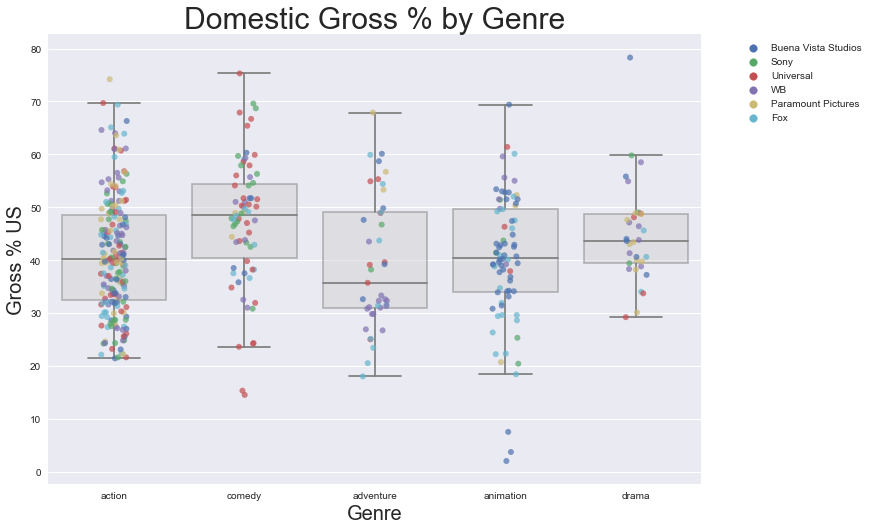

In [102]:
# Gross % US vs Genre w studio
# create figure of subplots for more control
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)   # size of A4 paper

# create vis to place into figure
ax = sns.boxplot(data=df,x='Genre',y='Gross % US',color='lightgray',orient='v',showfliers=False)
plt.setp(ax.artists,alpha=.5)

vis = sns.stripplot(data=df,x='Genre',y='Gross % US',\
                  hue='Studio',jitter=True,size=6,linewidth=0,alpha=.7)

ax.axes.set_title('Domestic Gross % by Genre',fontsize=30)
ax.set_ylabel('Gross % US',fontsize=20)
ax.set_xlabel('Genre',fontsize=20)

ax.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.show()